# Descriptive and plots HumanA
author: Nora Maleki (noora.maleki@gmail.com)
April 2022

## Import libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
colorblind_palette = ['#2d004b', '#5ab4ac', '#b2182b', '#8c510a','#4575b4','#8073ac']
sns.set_theme(font_scale=1, palette=colorblind_palette, style='darkgrid')

## Load data

In [37]:
FILE_PATH = r'../../data/01_main'


In [100]:
df_cleaned = pd.read_csv(f'{FILE_PATH}/07_preprocessed.csv')
df_cleaned.head()

,subject_id,body_pos_x,body_pos_z,pointer_pos_x,pointer_pos_z,pointer_dir_x,pointer_dir_z,building_center_z,building_center_x,human_agent,...,moved_target_position_z,target_to_x_180,dir_to_x_180,target_to_x_360,dir_to_x_360,final_180_angles,final_360_angles,rounded_180_angles,rounded_360_angles,absolute_180_angles
0,365,-114.329147,-139.997375,-114.236984,-139.696228,-0.055459,0.989548,53.288437,-72.578285,46,...,193.285812,77.811048,93.207763,77.811048,93.207763,15.396716,15.396716,15.0,15.0,15.396716
1,365,-65.669235,-159.945099,-65.474716,-159.710205,0.072550,0.992235,53.288437,-72.578285,46,...,213.233536,91.855810,85.818077,91.855810,85.818077,-6.037733,353.962267,-6.0,354.0,6.037733
2,365,38.849380,53.547638,38.471634,53.516281,-0.993265,-0.112792,53.288437,-72.578285,46,...,-0.259201,-179.866720,-173.521430,180.133280,186.478570,6.345290,6.345290,6.0,6.0,6.345290
3,365,38.880081,53.564148,38.700195,53.581047,-0.995648,-0.065598,53.288437,-72.578285,46,...,-0.275711,-179.858270,-176.230517,180.141730,183.769483,3.627752,3.627752,4.0,4.0,3.627752
4,365,110.754181,196.522675,110.428146,196.550751,-0.941145,-0.321944,53.288437,-72.578285,46,...,-143.234238,-142.000152,-161.115388,217.999848,198.884612,-19.115237,340.884763,-19.0,341.0,19.115237


In [46]:
N = df_cleaned.subject_id.nunique()
N

23

In [50]:
PLOT_PATH = f'{FILE_PATH}/plots/descriptive/{N}_subjects/'
PLOT_PATH_BUILDING = f'{PLOT_PATH}/buildings_subjects/'

os.makedirs(os.path.dirname(PLOT_PATH), exist_ok=True)
os.makedirs(os.path.dirname(PLOT_PATH_BUILDING), exist_ok=True)

## Starting locations

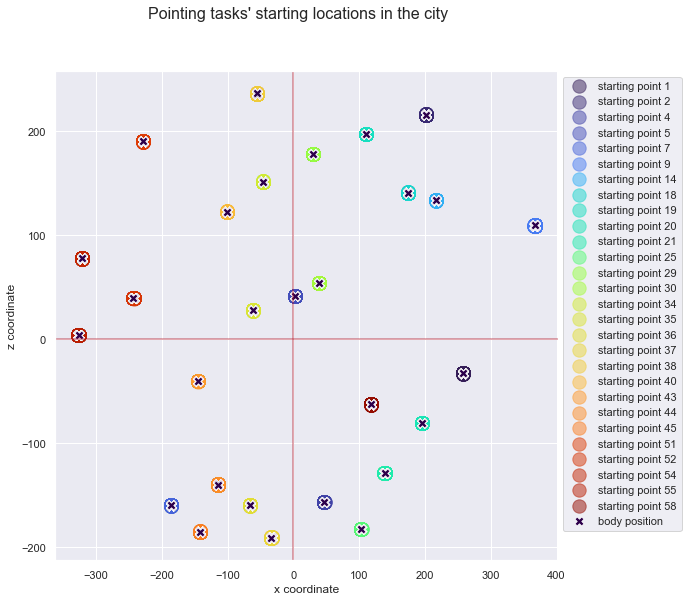

In [51]:
_, ax = plt.subplots(figsize=(9,9))

for i in df_cleaned.starting_loc_id.sort_values().unique():
    ax.scatter(df_cleaned[['body_pos_x']][df_cleaned.starting_loc_id==i],
               df_cleaned[['body_pos_z']][df_cleaned.starting_loc_id==i],
               label=f'starting point {i}',
               color=plt.cm.turbo(i/60),
               s=180,
               alpha=.5)

sns.scatterplot(
    data=df_cleaned,
    x='body_pos_x',
    y='body_pos_z',
    s=80,
    marker='X',
    label='body position'
).set(xlabel='x coordinate', ylabel='z coordinate')


plt.suptitle(t="Pointing tasks' starting locations in the city", size=16)
plt.axvline(x=0, color=colorblind_palette[2], alpha=.5)
plt.axhline(y=0, color=colorblind_palette[2], alpha=.5)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig(f'{PLOT_PATH}/starting_locations_kmeans_body.png', bbox_inches='tight', dpi=90)

plt.show()

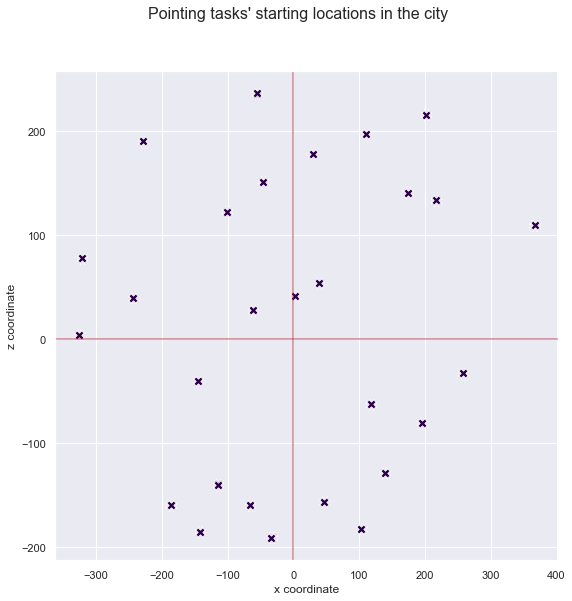

In [52]:
_, _ = plt.subplots(figsize=(9,9))

sns.scatterplot(
    data=df_cleaned,
    x='body_pos_x',
    y='body_pos_z',
    s=80,
    marker='X'
).set(xlabel='x coordinate', ylabel='z coordinate')


plt.suptitle(t="Pointing tasks' starting locations in the city", size=16)
plt.axvline(x=0, color=colorblind_palette[2], alpha=.5)
plt.axhline(y=0, color=colorblind_palette[2], alpha=.5)

plt.savefig(f'{PLOT_PATH}/starting_locations.png', bbox_inches='tight', dpi=90)

plt.show()

## Angular difference, Reaction times, and distance to target

#### Summary statistics

In [53]:
df_cleaned[['final_360_angles', 'final_180_angles', 'RT', 'distance_to_target']].describe()

,final_360_angles,final_180_angles,RT,distance_to_target
count,7708.000000,7708.000000,7708.000000,7708.000000
mean,197.959148,-5.906966,7.766701,289.501605
std,138.005205,65.109791,5.561891,139.738577
min,0.009861,-179.881808,0.955793,21.578343
25%,43.492190,-40.591635,3.621543,181.585388
50%,252.309056,-5.540527,6.063601,273.025892
75%,331.900265,25.333990,10.153734,384.936761
max,359.987723,179.983386,29.289794,738.776268


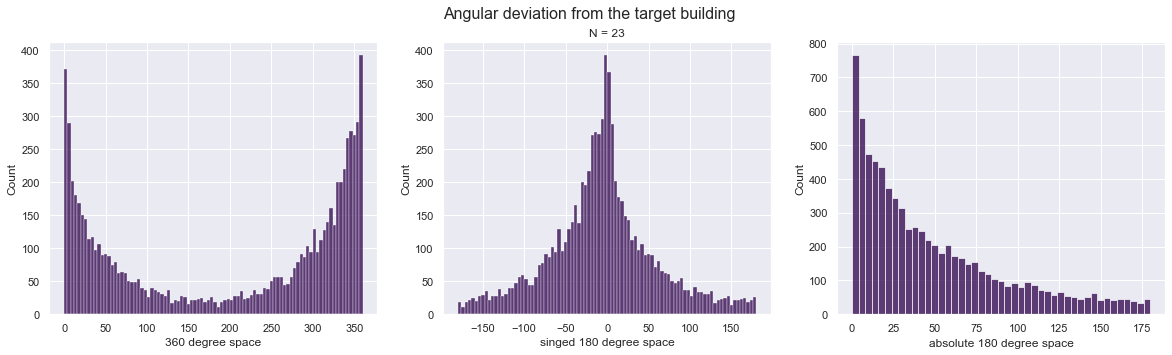

In [54]:
_, axes = plt.subplots(1, 3, figsize=(20,5))

sns.histplot(
    data=df_cleaned,
    x='final_360_angles',
    binwidth=4,
    ax=axes[0]
).set(xlabel='360 degree space')

sns.histplot(
    data=df_cleaned,
    x='final_180_angles',
    binwidth=4,
    ax=axes[1]
).set(xlabel='singed 180 degree space', title=f'N = {N}')

sns.histplot(
    data=df_cleaned,
    x='absolute_180_angles',
    binwidth=4,
    ax=axes[2]
).set(xlabel='absolute 180 degree space')

plt.suptitle('Angular deviation from the target building', size=16)
plt.savefig(f'{PLOT_PATH}/angular_diff_dist_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

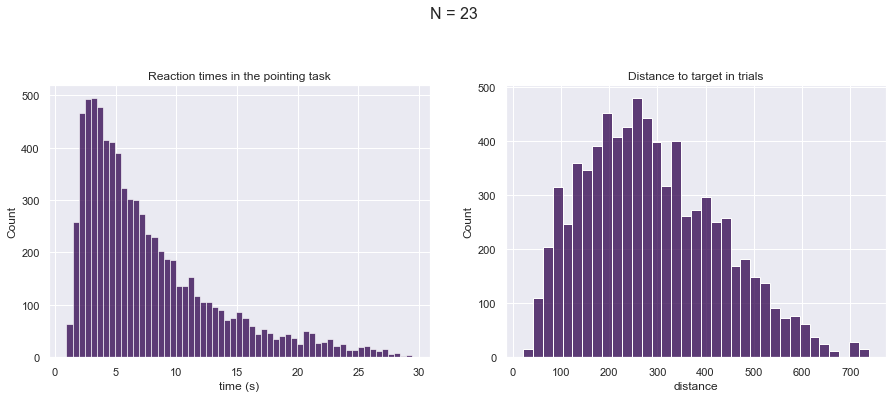

In [55]:
_, axes = plt.subplots(1,2, figsize=(15,5))

sns.histplot(
    data=df_cleaned,
    x='RT',
    binwidth=.5,
    ax=axes[0]
).set(xlabel='time (s)', title=f'Reaction times in the pointing task')

sns.histplot(
    data=df_cleaned,
    x='distance_to_target',
    ax=axes[1]
).set(xlabel='distance', title=f'Distance to target in trials')

plt.suptitle(f'N = {N}', size=16, y=1.1)
plt.savefig(f'{PLOT_PATH}/RT_dist_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

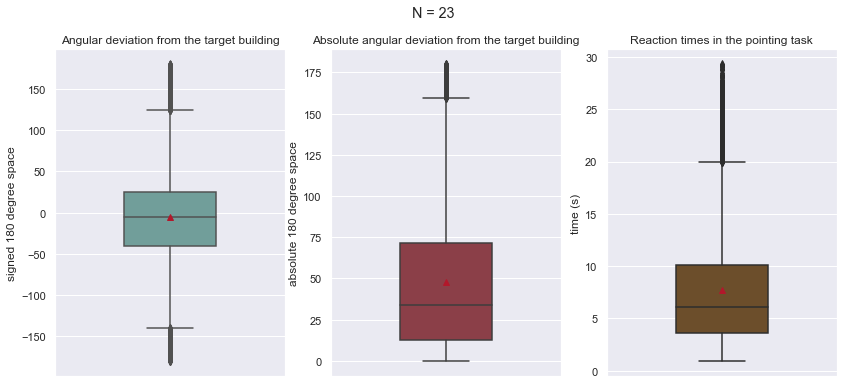

In [56]:
_, axes = plt.subplots(1, 3, figsize=(14,6))

sns.boxplot(
    data=df_cleaned,
    y='final_180_angles',
    orient='v',
    width=.4,
    saturation=.5,
    showmeans = True,
    color=colorblind_palette[1],
    ax=axes[0]
).set(ylabel='signed 180 degree space', title='Angular deviation from the target building')

sns.boxplot(
    data=df_cleaned,
    y='absolute_180_angles',
    orient='v',
    width=.4,
    saturation=.5,
    showmeans = True,
    color=colorblind_palette[2],
    ax=axes[1]
).set(ylabel='absolute 180 degree space', title='Absolute angular deviation from the target building')

sns.boxplot(
    data=df_cleaned,
    y='RT',
    orient='v',
    color=colorblind_palette[3],
    width=.4,
    saturation=.5,
    showmeans = True,
    ax=axes[2]
).set(ylabel='time (s)', title='Reaction times in the pointing task')

plt.suptitle(t=f'N = {N}')
plt.savefig(f'{PLOT_PATH}/angular_diff_RT_box_plot_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

#### Per subject

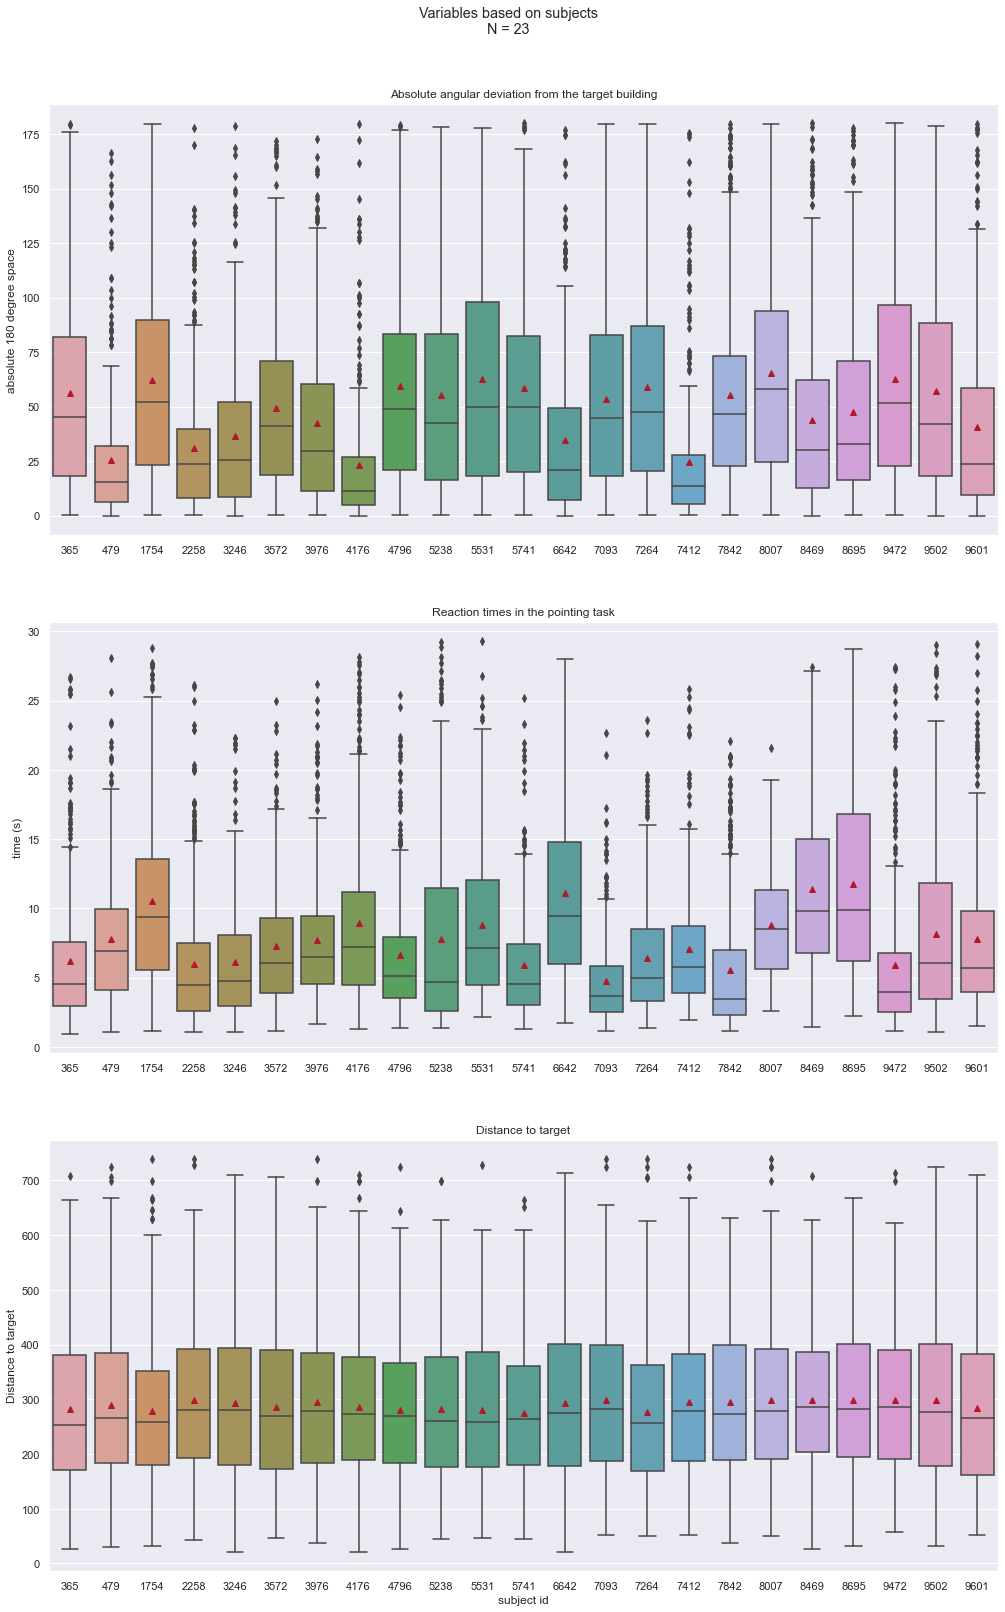

In [58]:
_, axes = plt.subplots(nrows=3, ncols=1, figsize=(17,27))

sns.boxplot(
    data=df_cleaned,
    x='subject_id',
    y='absolute_180_angles',
    orient='v',
    saturation=.5,
    showmeans = True,
    ax=axes[0]
).set(ylabel='absolute 180 degree space', xlabel='', title='Absolute angular deviation from the target building')


sns.boxplot(
    data=df_cleaned,
    x='subject_id',
    y='RT',
    orient='v',
    saturation=.5,
    showmeans = True,
    ax=axes[1]
).set(xlabel='', ylabel='time (s)', title='Reaction times in the pointing task')


sns.boxplot(
    data=df_cleaned,
    x='subject_id',
    y='distance_to_target',
    orient='v',
    saturation=.5,
    showmeans = True,
    ax=axes[2]
).set(title='Distance to target' , xlabel='subject id', ylabel='Distance to target')

plt.suptitle(t=f'Variables based on subjects\nN = {N}', y=.93)
plt.savefig(f'{PLOT_PATH}/angle_RT_distance_by_subject_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

#### Per starting location

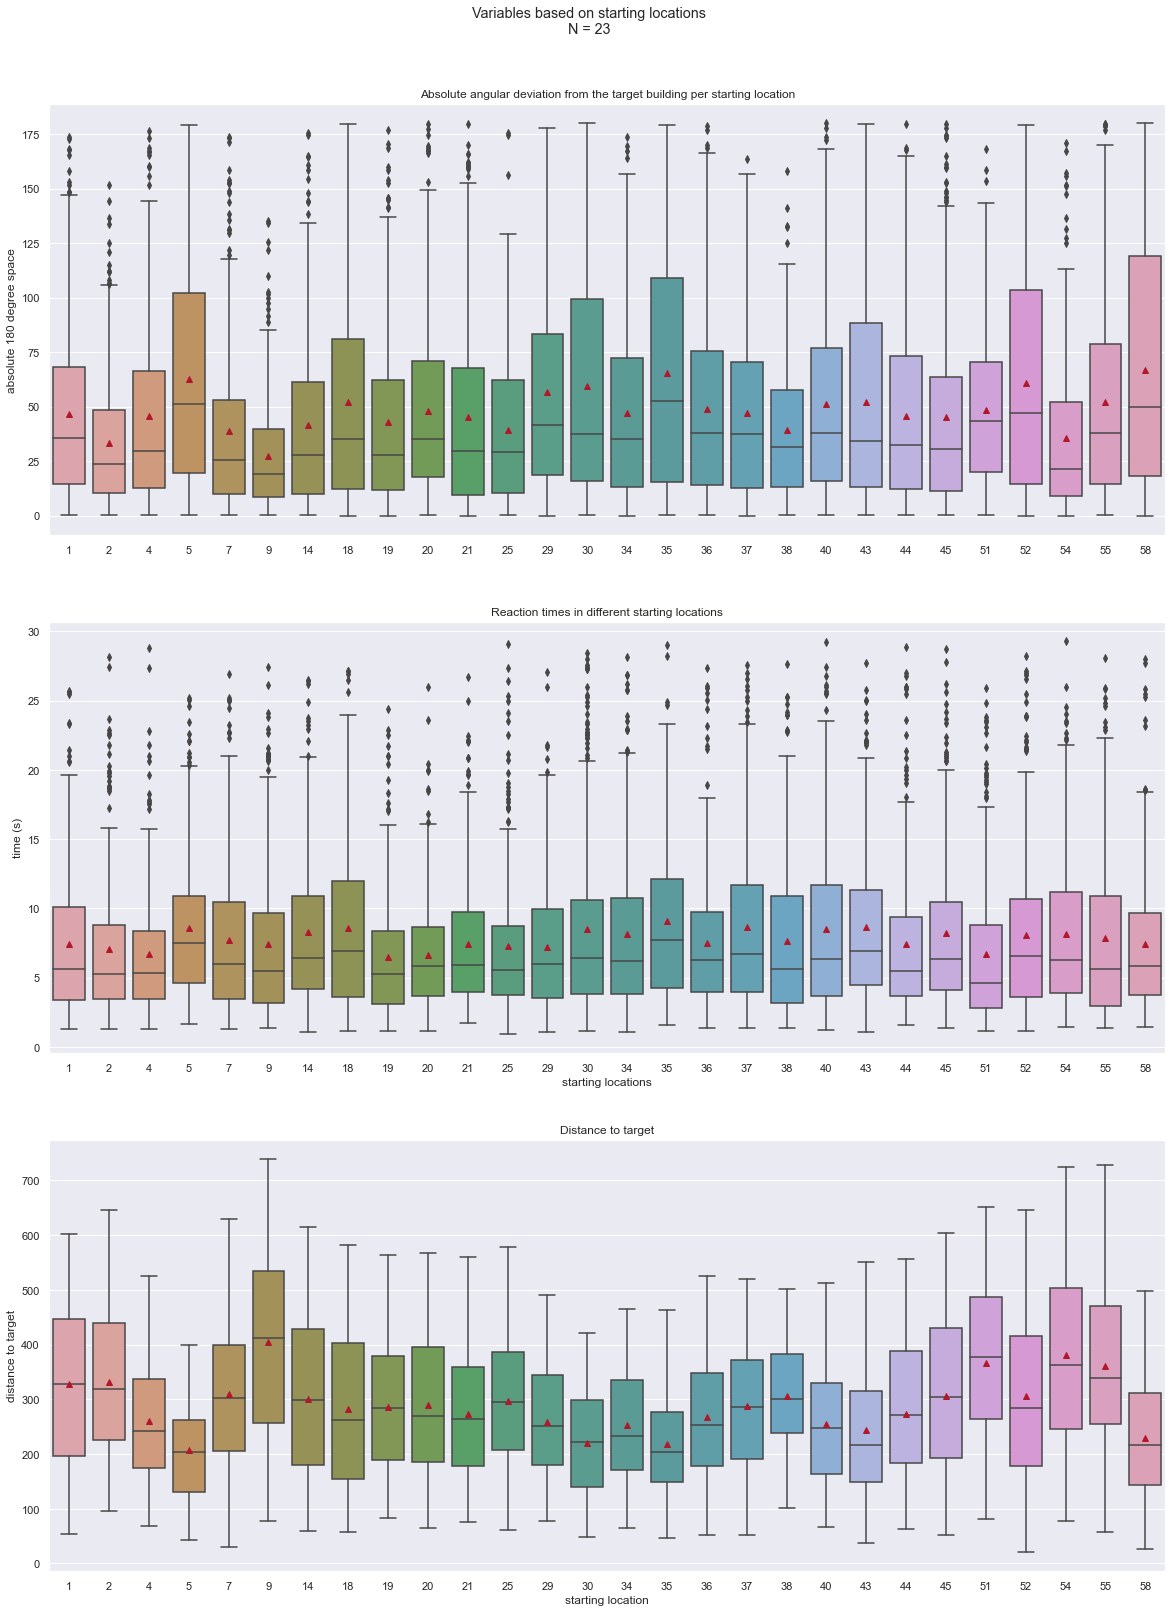

In [59]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (20, 27))

df = df_cleaned.sort_values('starting_loc_id')

sns.boxplot(
    data=df,
    x='starting_loc_id',
    y='absolute_180_angles',
    orient='v',
    saturation=.5,
    showmeans = True,
    ax=axes[0]
).set(ylabel='absolute 180 degree space', xlabel='', title='Absolute angular deviation from the target building per starting location')

sns.boxplot(
    data=df,
    x='starting_loc_id',
    y='RT',
    orient='v',
    saturation=.5,
    showmeans = True,
    ax=axes[1]
).set(xlabel='starting locations', ylabel='time (s)', title='Reaction times in different starting locations')


sns.boxplot(
    data=df,
    x='starting_loc_id',
    y='distance_to_target',
    orient='v',
    saturation=.5,
    showmeans = True,
    ax=axes[2]
).set(title='Distance to target' , xlabel='starting location', ylabel='distance to target')

plt.suptitle(t=f'Variables based on starting locations\nN = {N}', y=.93)
plt.savefig(f'{PLOT_PATH}/angle_RT_distance_starting_locations_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

#### Per building

Angular deviation

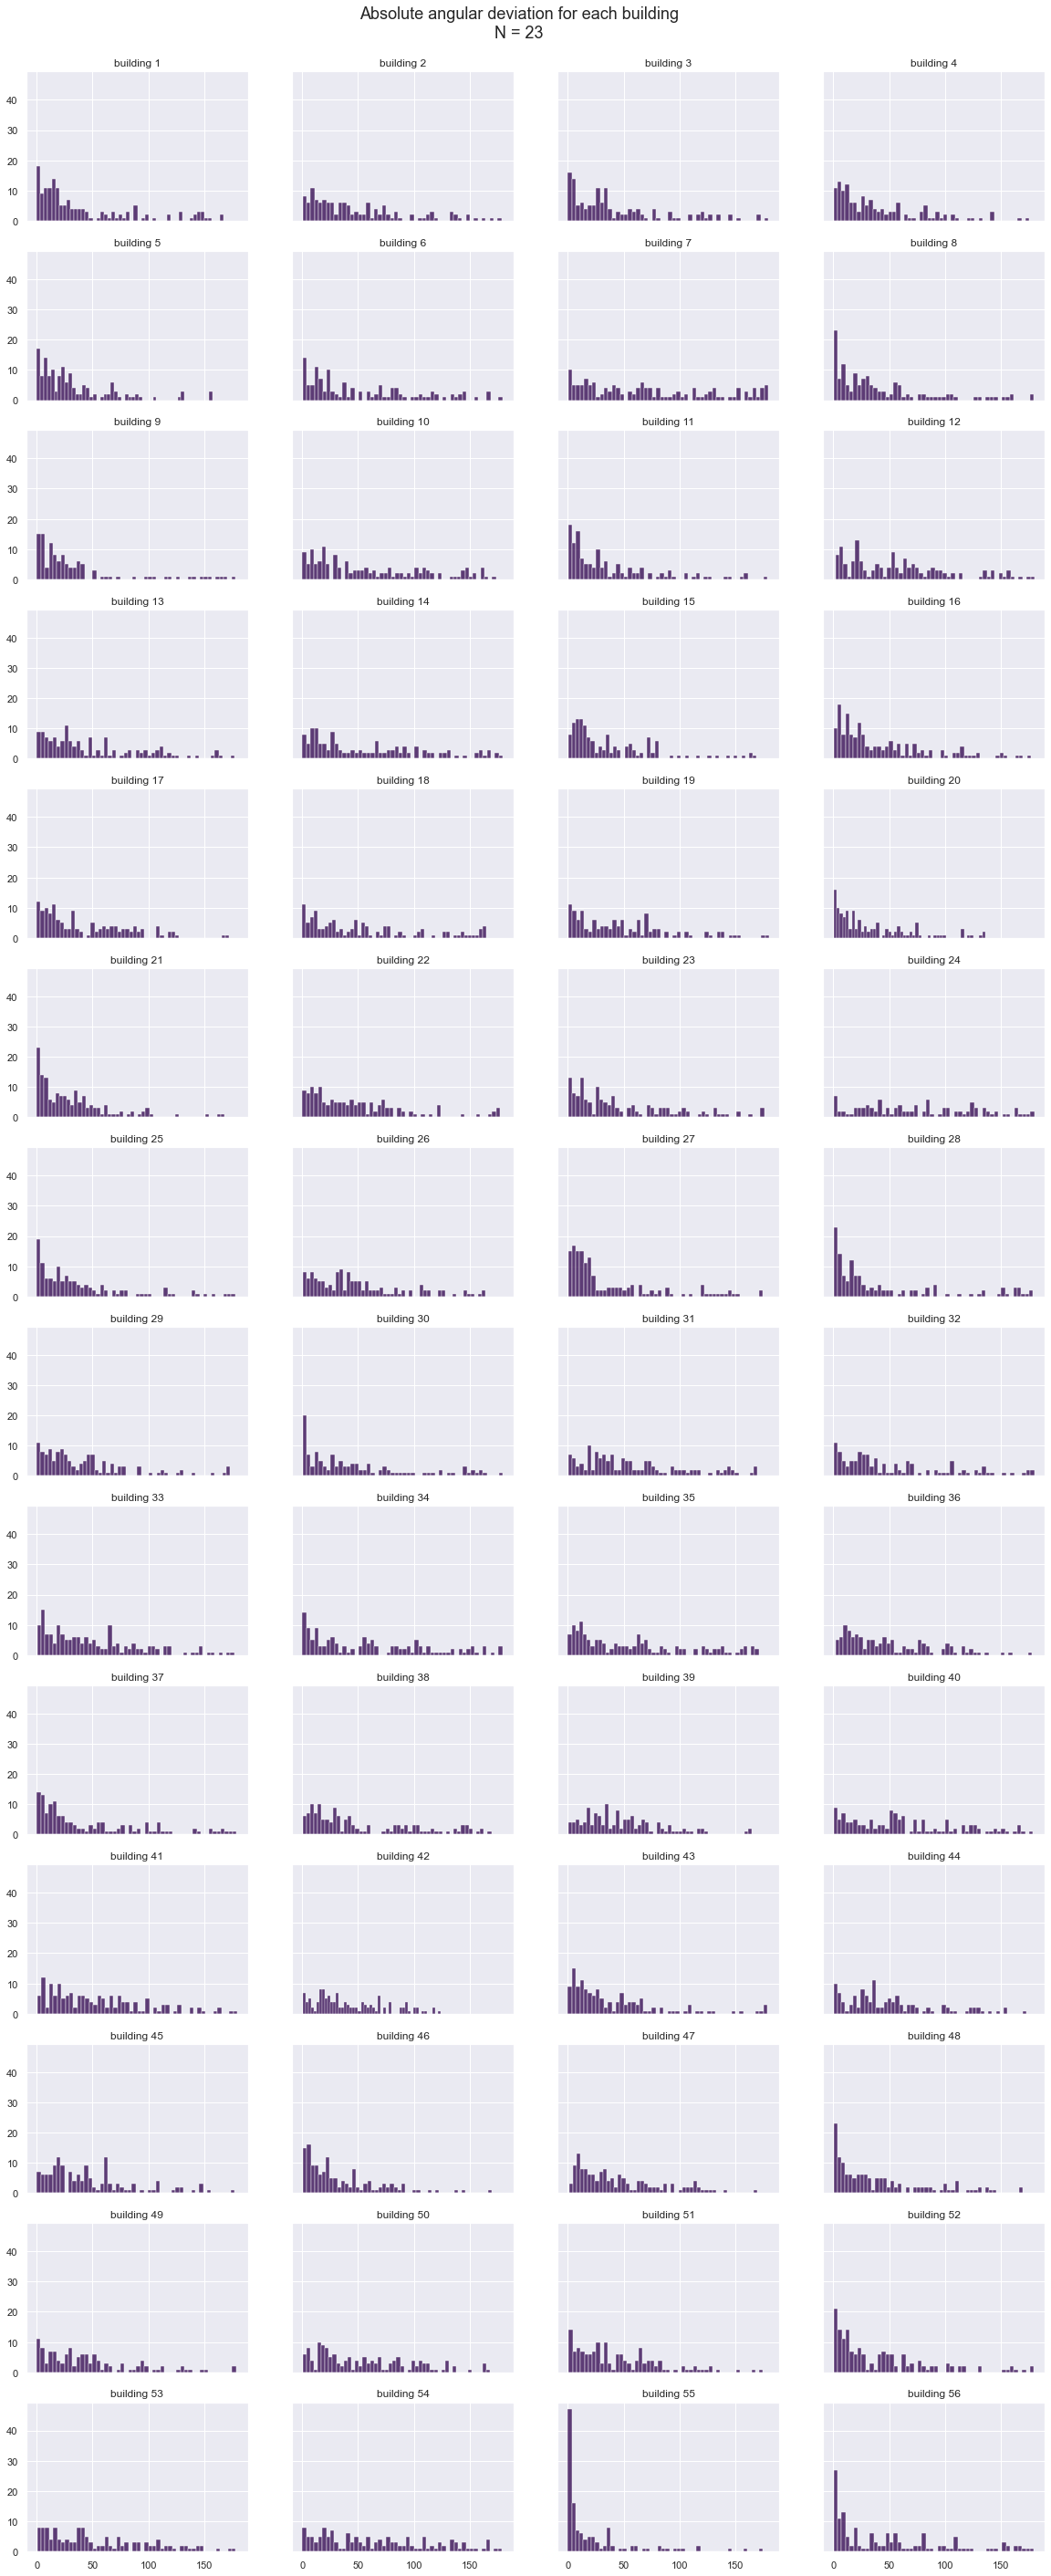

In [60]:
n_col = 4
n_row = 14

fig, axes = plt.subplots(n_row, n_col, sharex=True, sharey=True, figsize=(20,50))
plt.subplots_adjust(hspace=0.2)

for i, a in enumerate(df_cleaned.human_agent.sort_values().unique()):
    df = df_cleaned[['human_agent', 'absolute_180_angles']].query('human_agent==@a')
    ax = axes[i//n_col, i%n_col]
    sns.histplot(
        data=df,
        x='absolute_180_angles',
        bins=50,
        ax=ax
    ).set(title=f'building {a}', xlabel='', ylabel='')

plt.suptitle(t=f'Absolute angular deviation for each building\nN = {N}', size=18, y=.9)

fig.savefig(f'{PLOT_PATH}/angle_building_hist_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

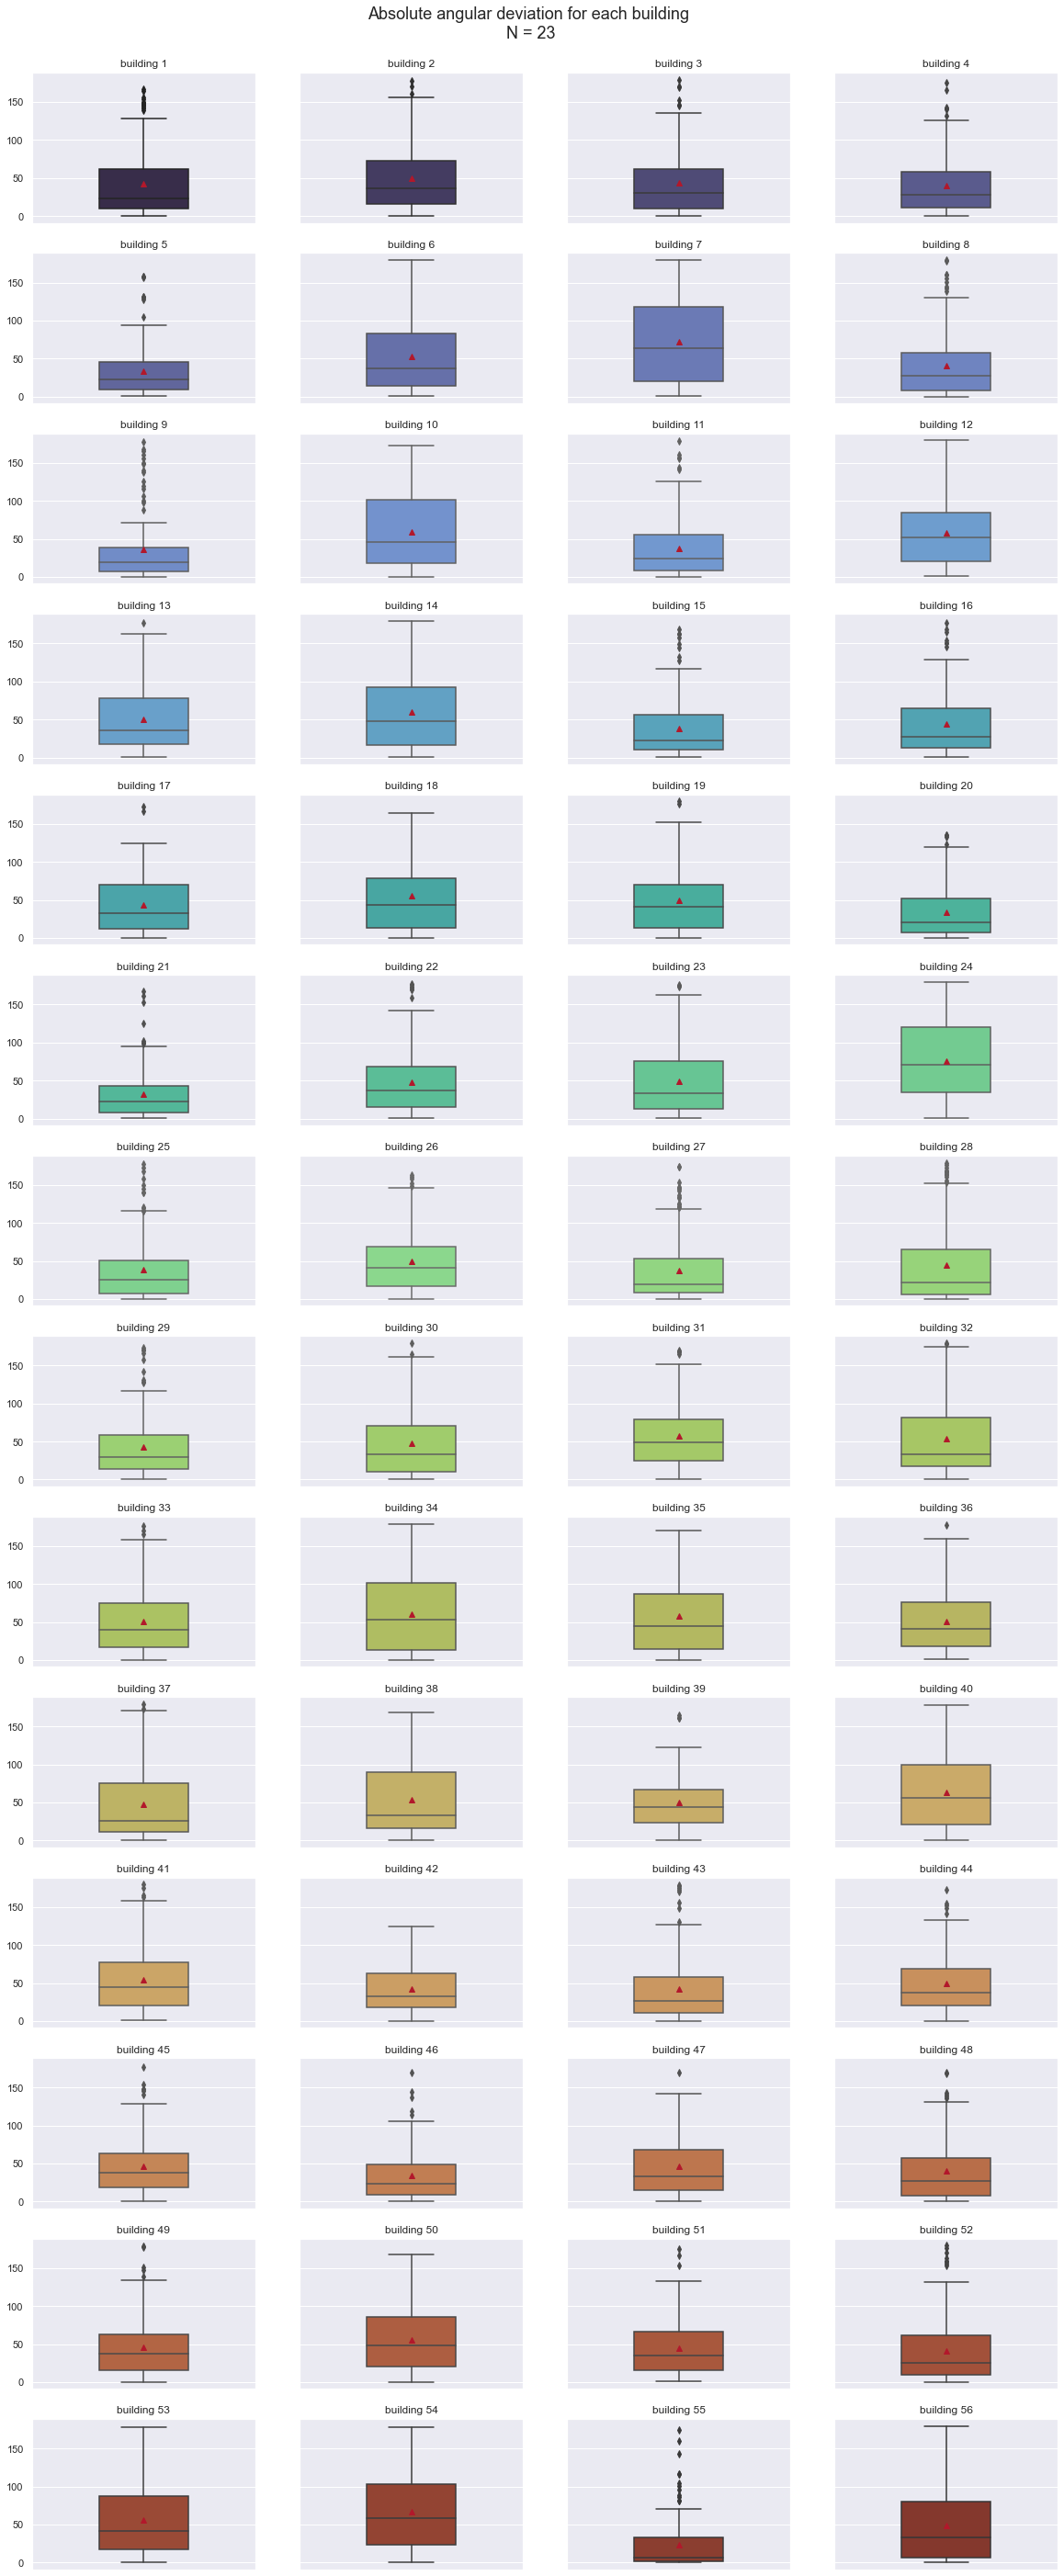

In [61]:
n_col = 4
n_row = 14

fig, axes = plt.subplots(n_row, n_col, sharex=True, sharey=True, figsize=(20,50))
plt.subplots_adjust(hspace=0.2)

for i, a in enumerate(df_cleaned.human_agent.sort_values().unique()):
    df = df_cleaned[['human_agent', 'absolute_180_angles']].query('human_agent==@a')
    ax = axes[i//n_col, i%n_col]
    sns.boxplot(
        data=df,
        y='absolute_180_angles',
        orient='v',
        color=plt.cm.turbo(a / 60),
        width=.4,
        saturation=.5,
        showmeans = True,
        ax=ax
    ).set(title=f'building {a}', xlabel='', ylabel='')

plt.suptitle(t=f'Absolute angular deviation for each building\n N = {N}', size=18, y=.9)

plt.savefig(f'{PLOT_PATH}/angle_building_box_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

#### Per subject for each building

In [62]:
for a in df_cleaned.human_agent.sort_values().unique():

    _, axes = plt.subplots(nrows=3, ncols=1, figsize=(27,27))
    df = df_cleaned.query('human_agent==@a')


    sns.boxplot(
        data=df,
        x='subject_id',
        y='absolute_180_angles',
        orient='v',
        saturation=.5,
        showmeans = True,
        ax=axes[0]
    ).set(ylabel='absolute 180 degree space', xlabel='', title='Absolute angular deviation from the target building')


    sns.boxplot(
        data=df,
        x='subject_id',
        y='RT',
        orient='v',
        saturation=.5,
        showmeans = True,
        ax=axes[1]
    ).set(ylabel='time (s)', xlabel='', title='Reaction times in the pointing task')

    sns.boxplot(
        data=df_cleaned,
        x='subject_id',
        y='distance_to_target',
        orient='v',
        saturation=.5,
        showmeans = True,
        ax=axes[2]
    ).set(ylabel='Distance to target', xlabel='subject id', title='Distance to target')

    plt.suptitle(t=f'Building {a}', size=18, y=.92)
    plt.savefig(f'{PLOT_PATH_BUILDING}/building_{a}_angle_RT_by_subject_{N}.png', bbox_inches='tight', dpi=90)
    plt.close()
    del df

### Per trials at each starting location

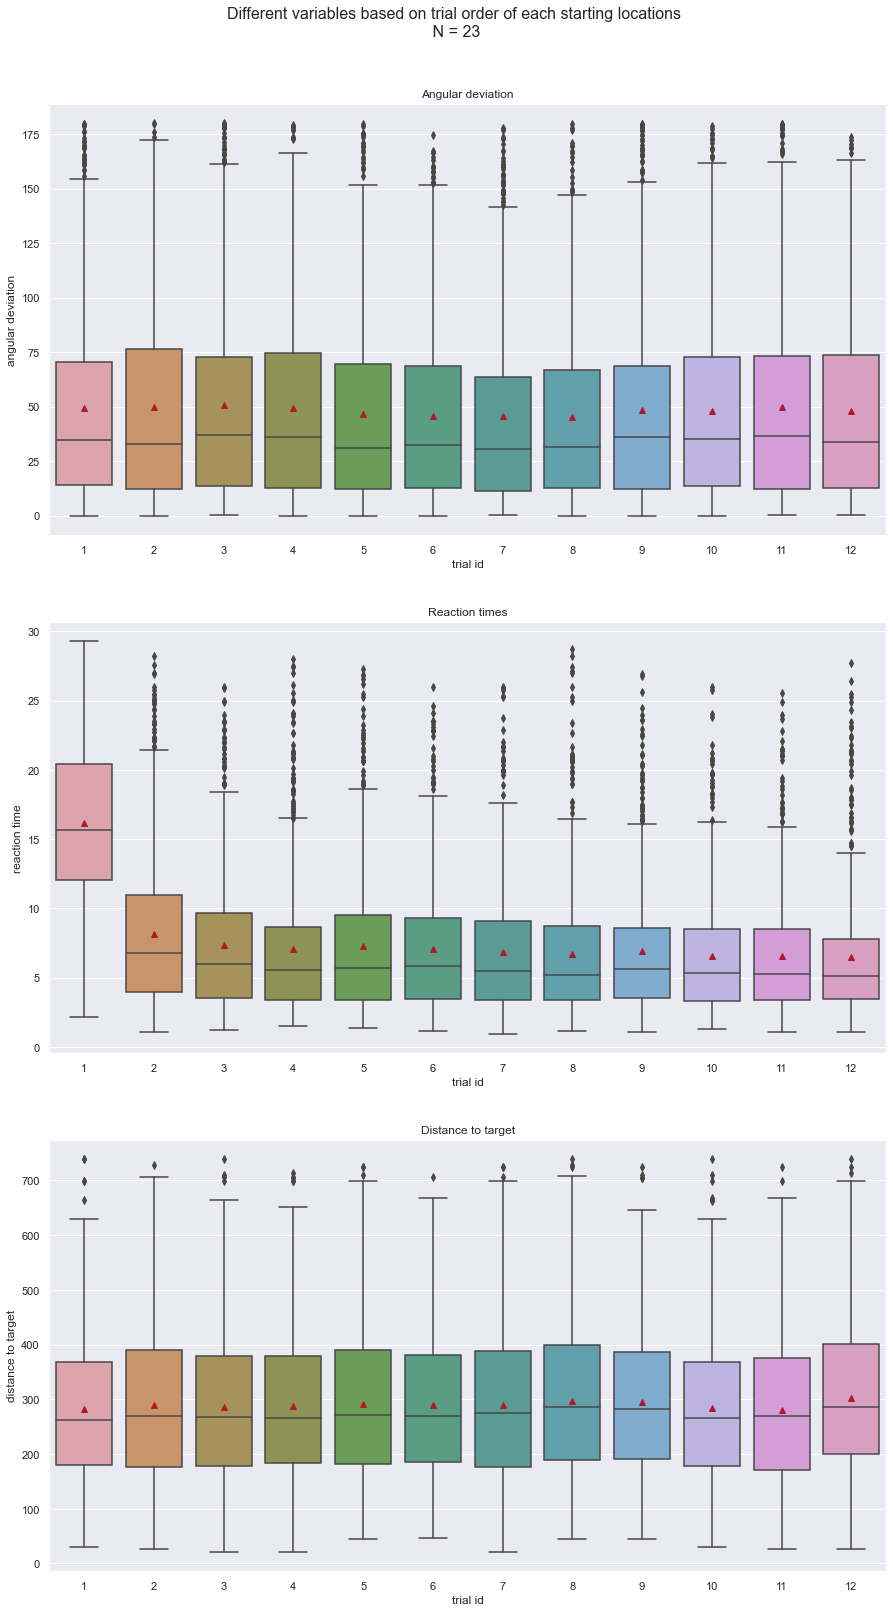

In [142]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (15, 27))

sns.boxplot(data=df_cleaned,
            x='trial_id_per_location',
            y='absolute_180_angles',
            orient='v',
            saturation=.5,
            showmeans = True,
            ax=axes[0]
            ).set(title='Angular deviation' ,xlabel='trial id', ylabel='angular deviation')

sns.boxplot(data=df_cleaned,
            x='trial_id_per_location',
            y='RT',
            orient='v',
            saturation=.5,
            showmeans = True,
            ax=axes[1]
            ).set(title='Reaction times', xlabel='trial id', ylabel='reaction time')

sns.boxplot(data=df_cleaned,
            x='trial_id_per_location',
            y='distance_to_target',
            orient='v',
            saturation=.5,
            showmeans = True,
            ax=axes[2]
            ).set(title='Distance to target', xlabel='trial id', ylabel='distance to target')

plt.suptitle(f'Different variables based on trial order of each starting locations\n N = {N}', size=16, y=.93)

plt.show()

fig.savefig(f'{PLOT_PATH}/per_trial_order_of_each_starting_location_{N}.png', bbox_inches='tight', dpi=90)

## Frequency and proportion of the angles

In [63]:
tmpdf = pd.DataFrame({
    'angles' : df_cleaned.rounded_360_angles.sort_values().unique(),
    'frequency' : df_cleaned.rounded_360_angles.value_counts().sort_index().values
})

tmpdf['proportion'] = tmpdf.frequency / len(df_cleaned)

tmpdf.to_csv(f'{FILE_PATH}/08_angle_frequency_proportion.csv', index=False)
del tmpdf

In [64]:
freq_df = pd.read_csv(f'{FILE_PATH}/08_angle_frequency_proportion.csv')
freq_df.head()

,angles,frequency,proportion
0,0.0,62,0.008044
1,1.0,102,0.013233
2,2.0,87,0.011287
3,3.0,79,0.010249
4,4.0,73,0.009471


In [65]:
freq_df.describe()

,angles,frequency,proportion
count,361.000000,361.000000,361.000000
mean,180.000000,21.351801,0.002770
std,104.355961,20.610833,0.002674
min,0.000000,1.000000,0.000130
25%,90.000000,7.000000,0.000908
50%,180.000000,13.000000,0.001687
75%,270.000000,28.000000,0.003633
max,360.000000,108.000000,0.014011


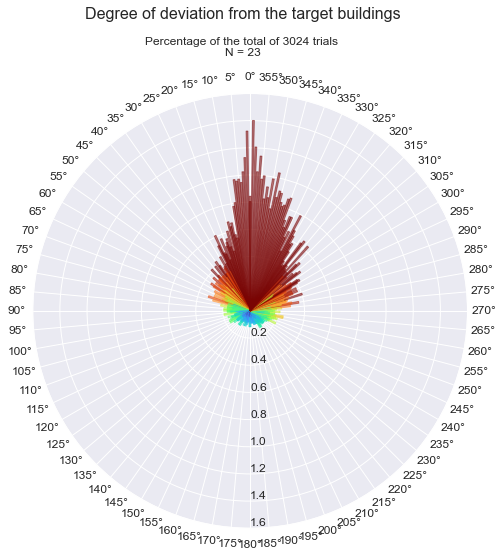

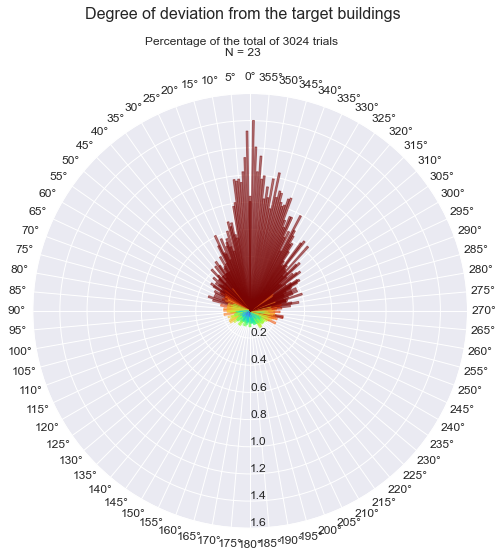

In [77]:
theta = np.deg2rad(freq_df.angles)
radii = freq_df.proportion
width = np.pi / (3*freq_df.frequency)

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(projection='polar'))

colors = plt.cm.turbo(freq_df.frequency / 20)

ax.bar(theta, radii, width=width, color=colors, edgecolor=colors, bottom=0, alpha=0.5)

ax.set_rmax(0.016)
ax.set_theta_zero_location('N')
ax.set_rlabel_position(180)
ax.tick_params(labelsize=12)
ax.set_thetagrids(range(0, 360, 5))
ax.set_yticks(ax.get_yticks())

labels = [round(x*100, 1) for x in ax.get_yticks()]
ax.set_yticklabels(labels=labels)

plt.suptitle('Degree of deviation from the target buildings', size=16, y=1.03)
fig.text(0.5, 0.96, f'Percentage of the total of 3024 trials \nN = {N}', ha='center', va='center', size=12)

plt.savefig(f'{PLOT_PATH}/deviation_degree_all_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

## Angular difference to target by Factors `avatar presence` and  `context meaningfulness`

In [101]:
prop_dict = dict(freq_df[['frequency', 'proportion']].values)

tmpdf = (df_cleaned
         .groupby(['human_agent_presence', 'meaningful', 'rounded_360_angles'])
         .rounded_360_angles
         .count()
         .reset_index(level=[0,1])
         .rename(columns={'rounded_360_angles' : 'frequency'})
         .reset_index()
         .rename(columns={'rounded_360_angles' : 'angles'})
         )
tmpdf['proportion'] = tmpdf.frequency.map(prop_dict)
tmpdf['theta'] = np.deg2rad(tmpdf.angles)

tmpdf.to_csv(f'{FILE_PATH}/09_factors_angle_frequency.csv', index=False)
del tmpdf

In [102]:
factors_df = pd.read_csv(f'{FILE_PATH}/09_factors_angle_frequency.csv')
factors_df.head()

,angles,human_agent_presence,meaningful,frequency,proportion,theta
0,0.0,False,False,12,0.001557,0.000000
1,1.0,False,False,30,0.003892,0.017453
2,2.0,False,False,15,0.001946,0.034907
3,3.0,False,False,17,0.002206,0.052360
4,4.0,False,False,18,0.002335,0.069813


In [103]:
factors_df.describe()

,angles,frequency,proportion,theta
count,1317.000000,1317.000000,1317.000000,1317.000000
mean,180.425209,5.852696,0.000759,3.149014
std,108.425783,5.548996,0.000720,1.892387
min,0.000000,1.000000,0.000130,0.000000
25%,82.000000,2.000000,0.000259,1.431170
50%,182.000000,4.000000,0.000519,3.176499
75%,278.000000,8.000000,0.001038,4.852015
max,360.000000,33.000000,0.004281,6.283185


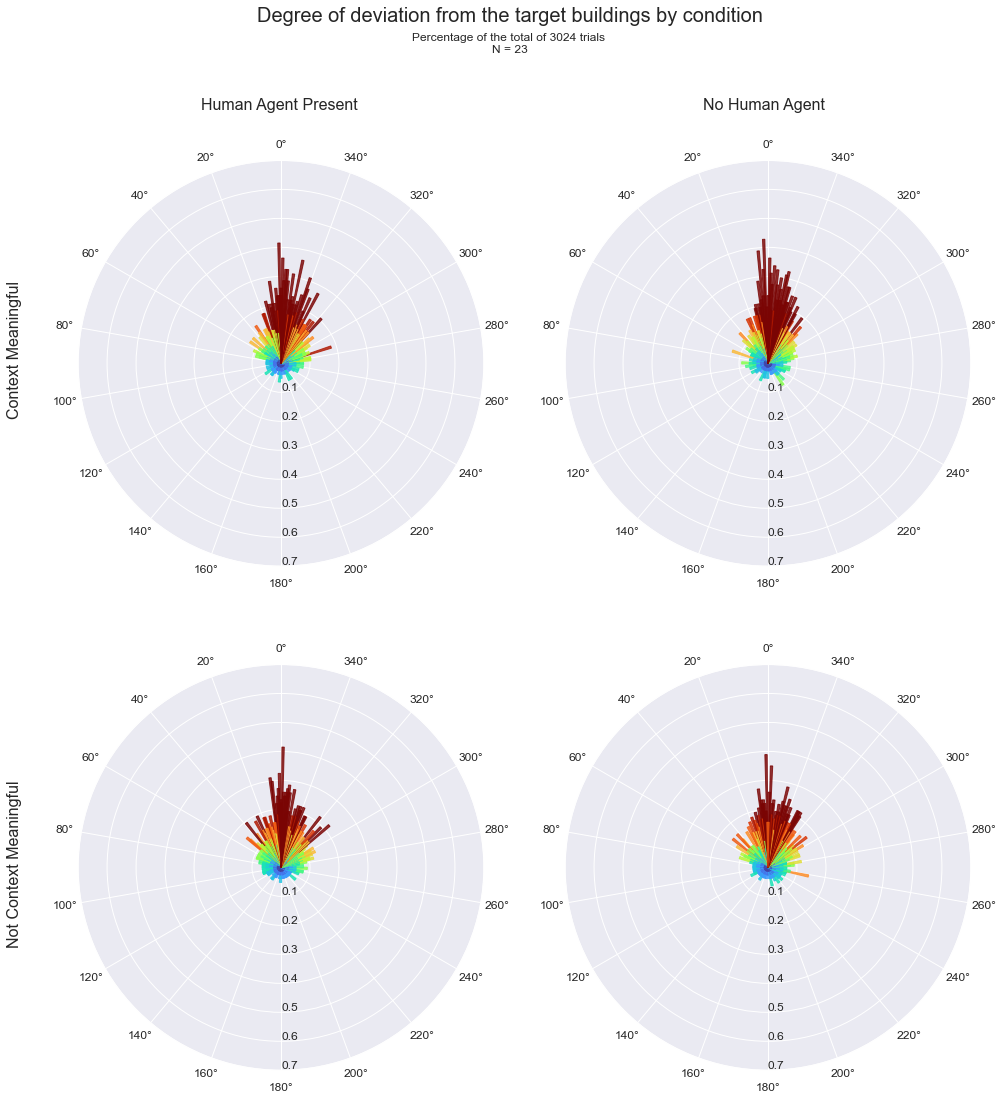

In [104]:
fig, axes = plt.subplots(2, 2, figsize=(16,17), subplot_kw=dict(projection='polar'))
s, y = 14, 1.08

df1 = factors_df.query('meaningful==True & human_agent_presence==True')
df2 = factors_df.query('meaningful==True & human_agent_presence==False')
df3 = factors_df.query('meaningful==False & human_agent_presence==True')
df4 = factors_df.query('meaningful==False & human_agent_presence==False')

dfs = [df1, df2, df3, df4]

for i, df in enumerate(dfs):
    theta = df.theta
    radii = df.proportion
    width = np.pi / (5*df.frequency)
    colors = plt.cm.turbo(df.frequency / 15)

    ax = axes.flatten()[i]

    ax.bar(theta, radii, width=width, color=colors, edgecolor=colors, bottom=0, alpha=0.8)

    ax.set_rmax(0.007)
    ax.set_theta_zero_location('N')
    ax.set_rlabel_position(180)
    ax.tick_params(labelsize=12)
    ax.set_thetagrids(range(0, 360, 20))
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(labels=[round(x*100, 1) for x in ax.get_yticks()])

fig.text(0.3, 0.92, 'Human Agent Present', ha='center', va='center', size=16)
fig.text(0.72, 0.92, 'No Human Agent', ha='center', va='center', size=16)
fig.text(0.07, 0.72, 'Context Meaningful', ha='center', va='center', rotation='vertical', size=16)
fig.text(0.07, 0.3, 'Not Context Meaningful', ha='center', va='center', rotation='vertical', size=16)
fig.text(0.5, 0.97, f'Percentage of the total of 3024 trials \nN = {N}', ha='center', va='center', size=12)

plt.suptitle('Degree of deviation from the target buildings by condition', size=20, y=1)
plt.savefig(f'{PLOT_PATH}/conditions_deviation_degree_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

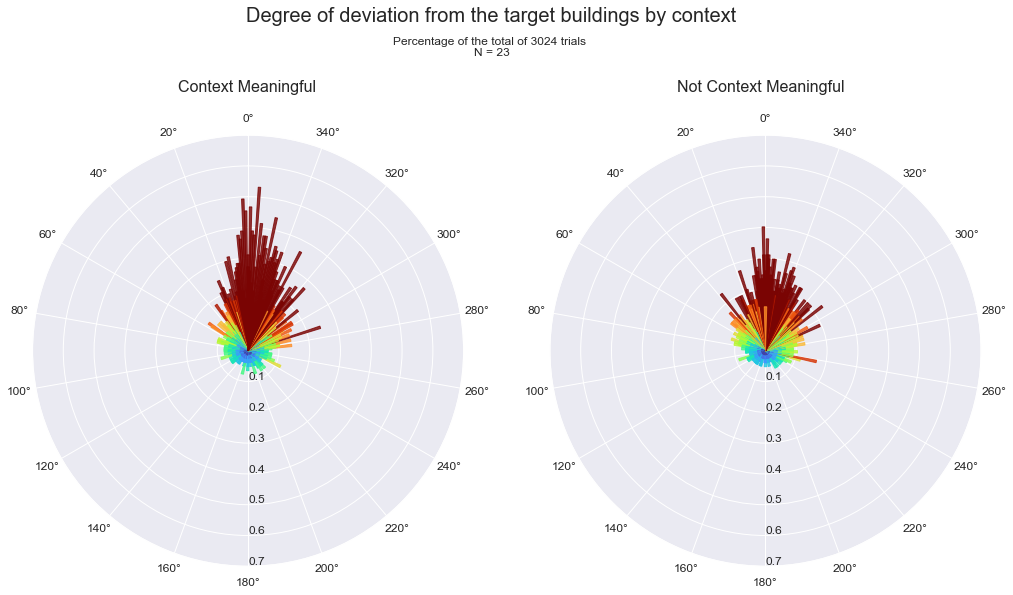

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(17,8), subplot_kw=dict(projection='polar'))
s, y = 14, 1.08

df1 = factors_df.query('meaningful==True')
df2 = factors_df.query('meaningful==False')

dfs = [df1, df2]

for i, df in enumerate(dfs):
    theta = df.theta
    radii = df.proportion
    width = np.pi / (5*df.frequency)
    colors = plt.cm.turbo(df.frequency / 15)

    ax = axes.flatten()[i]

    ax.bar(theta, radii, width=width, color=colors, edgecolor=colors, bottom=0, alpha=0.8)

    ax.set_rmax(0.007)
    ax.set_theta_zero_location('N')
    ax.set_rlabel_position(-180)
    ax.tick_params(labelsize=12)
    ax.set_thetagrids(range(0, 360, 20))
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(labels=[round(x*100, 1) for x in ax.get_yticks()])

fig.text(0.3, 0.96, 'Context Meaningful', ha='center', va='center', size=16)
fig.text(0.72, 0.96, 'Not Context Meaningful', ha='center', va='center', size=16)
fig.text(0.5, 1.03, f'Percentage of the total of 3024 trials \nN = {N}', ha='center', va='center', size=12)

plt.suptitle('Degree of deviation from the target buildings by context', size=20, y=1.1)
plt.savefig(f'{PLOT_PATH}/by_context_deviation_degree_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

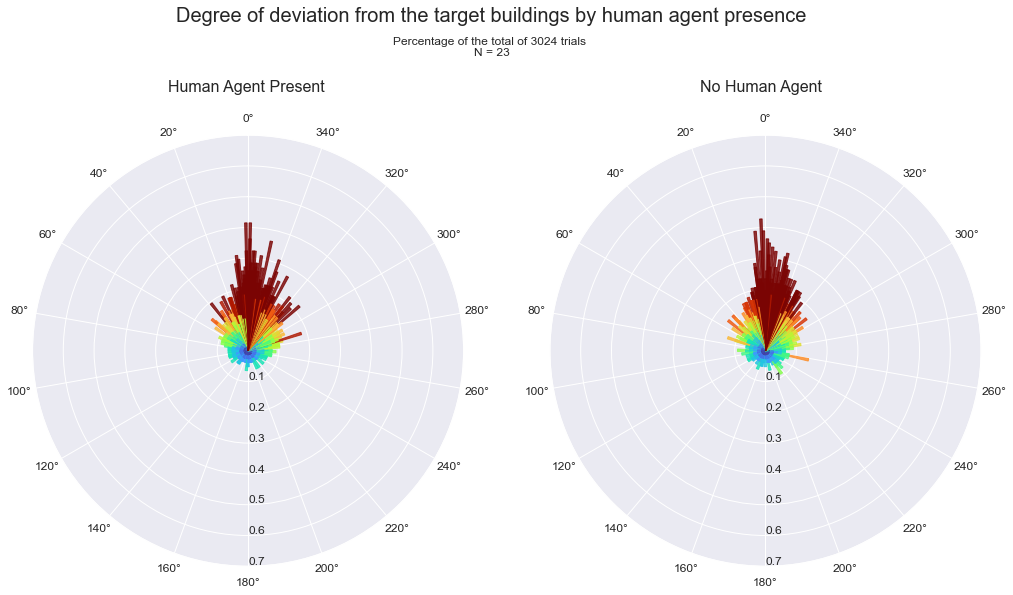

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(17,8), subplot_kw=dict(projection='polar'))
s, y = 14, 1.08

df1 = factors_df.query('human_agent_presence==True')
df2 = factors_df.query('human_agent_presence==False')

dfs = [df1, df2]

for i, df in enumerate(dfs):
    theta = df.theta
    radii = df.proportion
    width = np.pi / (5*df.frequency)
    colors = plt.cm.turbo(df.frequency / 15)

    ax = axes.flatten()[i]

    ax.bar(theta, radii, width=width, color=colors, edgecolor=colors, bottom=0, alpha=0.8)

    ax.set_rmax(0.007)
    ax.set_theta_zero_location('N')
    ax.set_rlabel_position(-180)
    ax.tick_params(labelsize=12)
    ax.set_thetagrids(range(0, 360, 20))
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(labels=[round(x*100, 1) for x in ax.get_yticks()])

fig.text(0.3, 0.96, 'Human Agent Present', ha='center', va='center', size=16)
fig.text(0.72, 0.96, 'No Human Agent', ha='center', va='center', size=16)
fig.text(0.5, 1.03, f'Percentage of the total of 3024 trials \nN = {N}', ha='center', va='center', size=12)

plt.suptitle('Degree of deviation from the target buildings by human agent presence', size=20, y=1.1)
plt.savefig(f'{PLOT_PATH}/by_human_agent_presence_deviation_degree_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

## Trial counts for conditions

In [118]:
trial_count_df = df_cleaned.groupby(['meaningful', 'human_agent_presence']).trial_id.count().reset_index()
trial_count_df

,meaningful,human_agent_presence,trial_id
0,False,False,1910
1,False,True,1958
2,True,False,1940
3,True,True,1900


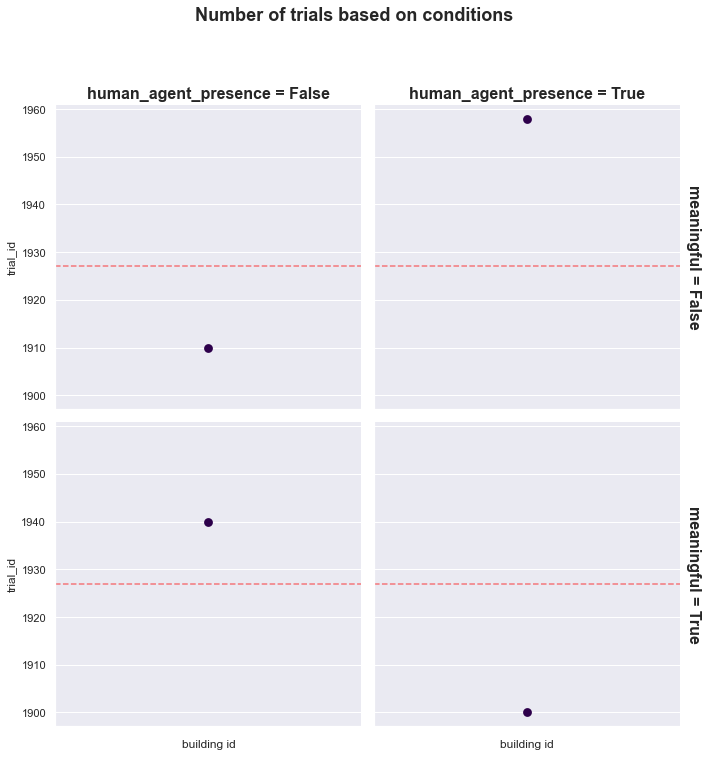

In [140]:
g = sns.catplot(
    data=trial_count_df,
    y='trial_id',
    col='human_agent_presence',
    row='meaningful',
    kind='point',
    margin_titles=True
)

for ax in g.axes.flatten():
    ax.axhline(np.mean(trial_count_df.trial_id), c='r', alpha=.5, ls='--')

plt.suptitle('Number of trials based on conditions', fontweight='bold', size=18, y=1.05)
g.set_titles(fontweight='bold', size=16)
g.set_axis_labels('building id')
g.tight_layout()

g.savefig(f'{PLOT_PATH}/condition_count_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

In [110]:
trial_count_subject_df = df_cleaned.groupby(['subject_id', 'meaningful', 'human_agent_presence']).trial_id.count()
trial_count_subject_df

subject_id  meaningful  human_agent_presence
365         False       False                   88
                        True                    81
            True        False                   79
                        True                    85
479         False       False                   73
                                                ..
9502        True        True                    80
9601        False       False                   86
                        True                    80
            True        False                   82
                        True                    87
Name: trial_id, Length: 92, dtype: int64

## Building counts

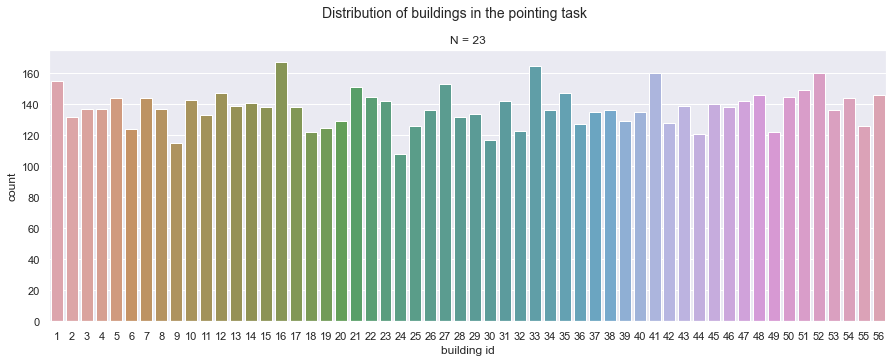

In [112]:
_, axes = plt.subplots(figsize=(15,5))

sns.countplot(
    data=df_cleaned,
    x='human_agent',
    orient='v',
    saturation=.5
).set(xlabel='building id', title=f'N = {N}')

plt.suptitle(t='Distribution of buildings in the pointing task', size=14, y=1)
plt.savefig(f'{PLOT_PATH}/buildings_distribution_{N}.png', bbox_inches='tight', dpi=90)
plt.show()

Per subject

In [113]:
for subj in df_cleaned.subject_id.unique():

    _, axes = plt.subplots(figsize=(15,5))
    df = df_cleaned.query('subject_id==@subj')

    sns.countplot(
        data=df,
        x='human_agent',
        orient='v',
        saturation=.5
    ).set(xlabel='building id', title=f'Subject {subj}')

    plt.suptitle(t='Distribution of buildings in the pointing task', size=14, y=1)
    plt.savefig(f'{PLOT_PATH_BUILDING}/subject_{subj}_buildings_distribution.png', bbox_inches='tight', dpi=90)
    plt.close()
    del df

Based on meaningfulness and avatar presence

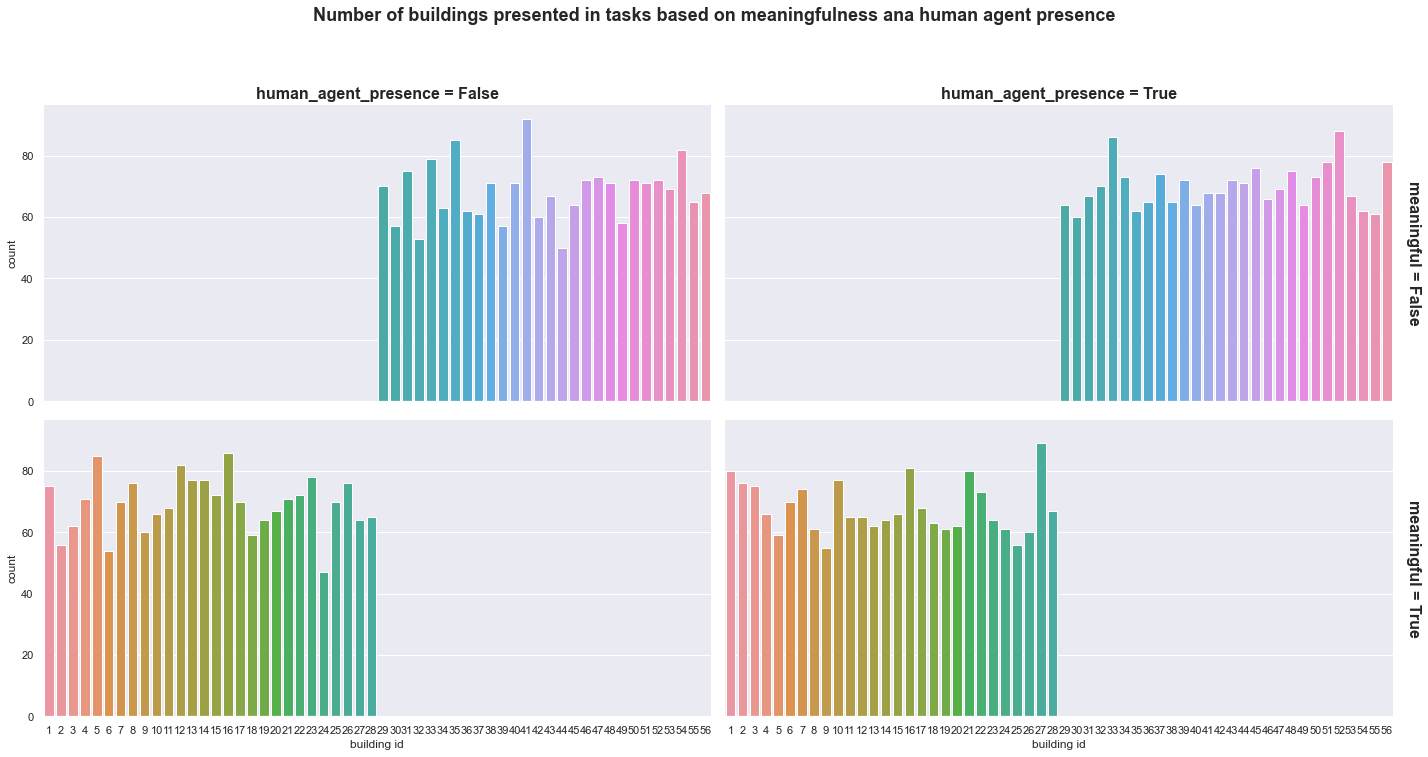

In [114]:
g = sns.catplot(
    data=df_cleaned,
    x='human_agent',
    col='human_agent_presence',
    row='meaningful',
    kind='count',
    aspect=2,
    margin_titles=True
)

plt.suptitle('Number of buildings presented in tasks based on meaningfulness ana human agent presence', fontweight='bold', size=18, y=1.05)
g.set_titles(fontweight='bold', size=16)
g.set_axis_labels('building id')
g.tight_layout()

g.savefig(f'{PLOT_PATH}/buildings_distribution_meaning_agent_{N}.png', bbox_inches='tight', dpi=90)

plt.show()

Per subject

In [115]:
for subj in df_cleaned.subject_id.unique():
    df = df_cleaned.query('subject_id==@subj')

    g = sns.catplot(
        data=df,
        x='human_agent',
        col='human_agent_presence',
        row='meaningful',
        kind='count',
        aspect=2,
        margin_titles=True
    )

    plt.suptitle(f'Number of buildings presented in tasks based on meaningfulness ana human agent presence\n subject {subj}', fontweight='bold', size=18, y=1.05)
    g.set_titles(fontweight='bold', size=16)
    g.set_axis_labels('building id')
    g.tight_layout()

    g.savefig(f'{PLOT_PATH_BUILDING}/subject_{subj}_buildings_distribution_meaning_agent_{N}.png', bbox_inches='tight', dpi=90)
    plt.close()
    del df